1) Prepare a classification model using Naive Bayes 

for salary data 

Data Description:


age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train = pd.read_csv('SalaryData_Train.csv')

In [3]:
test = pd.read_csv('SalaryData_Test.csv')

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [10]:
train.duplicated().sum()

3258

In [11]:
train.shape

(30161, 14)

In [12]:
Train=train.drop_duplicates()

In [13]:
Train.shape

(26903, 14)

In [14]:
test.duplicated().sum()

930

In [15]:
test.shape

(15060, 14)

In [16]:
Test=test.drop_duplicates()

In [17]:
Test.shape

(14130, 14)

In [18]:
train.isnull().sum().any()

False

In [19]:
test.isnull().sum().any()

False

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

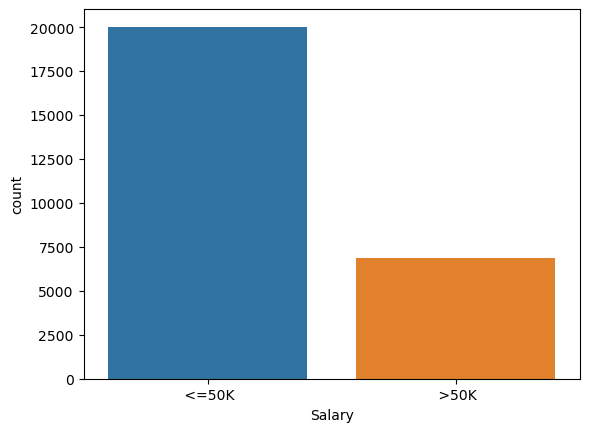

In [20]:
sn.countplot(x='Salary',data= Train)
Train['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

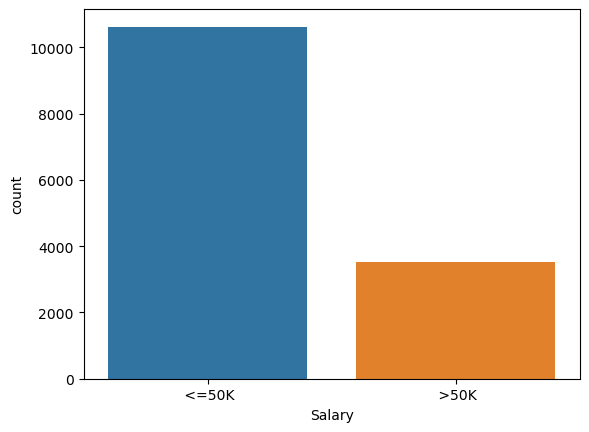

In [21]:
sn.countplot(x='Salary',data= Test)
Test['Salary'].value_counts()

> It means more people are of Salary less than 50k

<AxesSubplot:xlabel='age'>

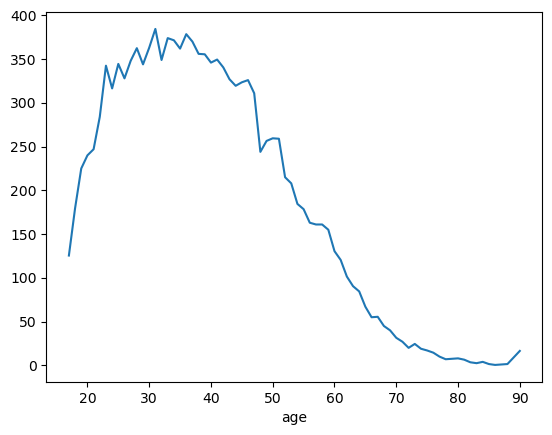

In [22]:
pd.crosstab(Train['Salary'],Train['age']).mean().plot(kind='line')

> More data of people around 30 years old

<AxesSubplot:xlabel='workclass'>

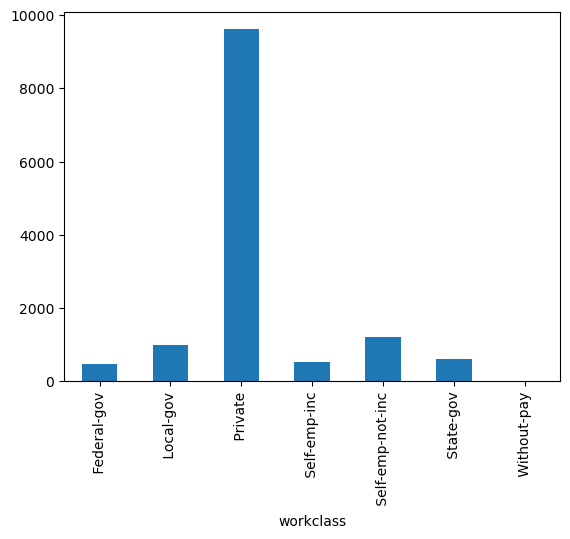

In [23]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

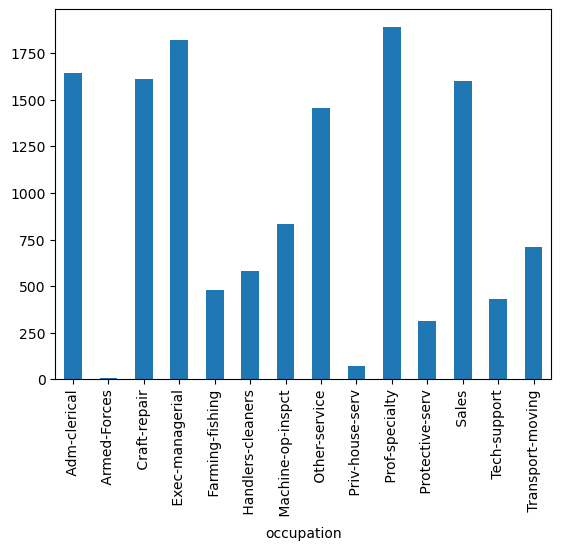

In [24]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

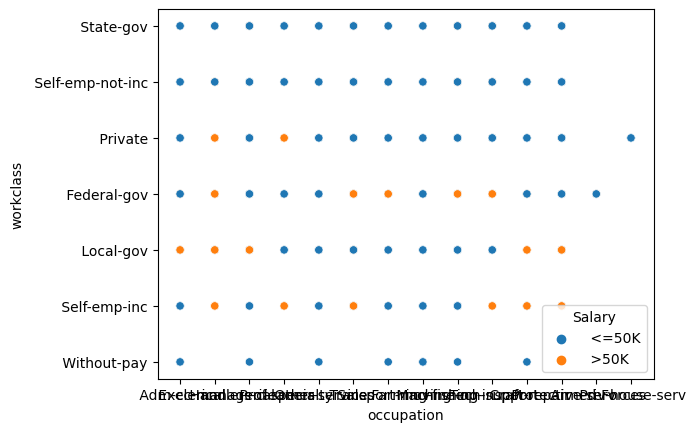

In [25]:
sn.scatterplot(Train['occupation'],Train['workclass'],hue=Train['Salary'])

<AxesSubplot:xlabel='education'>

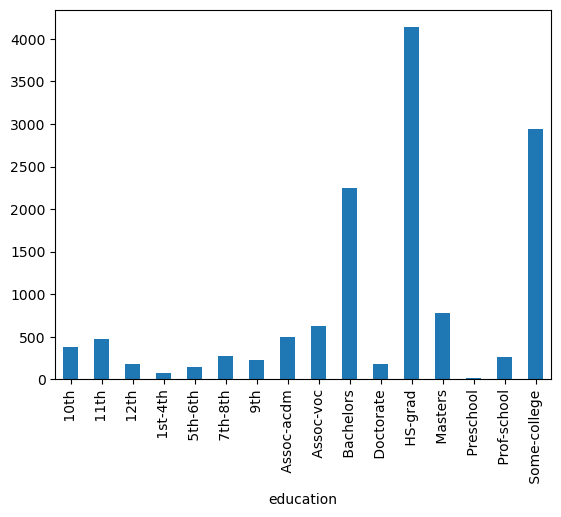

In [26]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

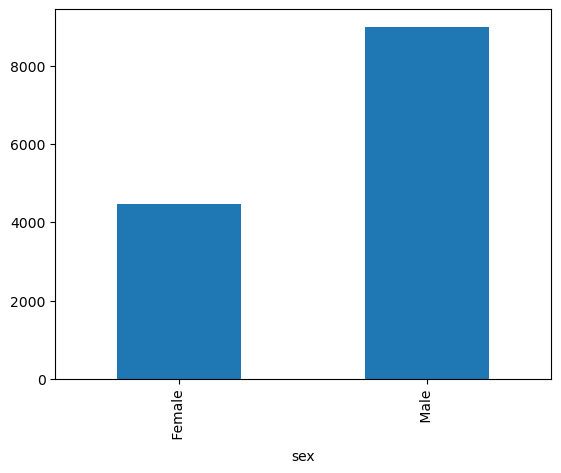

In [27]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='maritalstatus'>

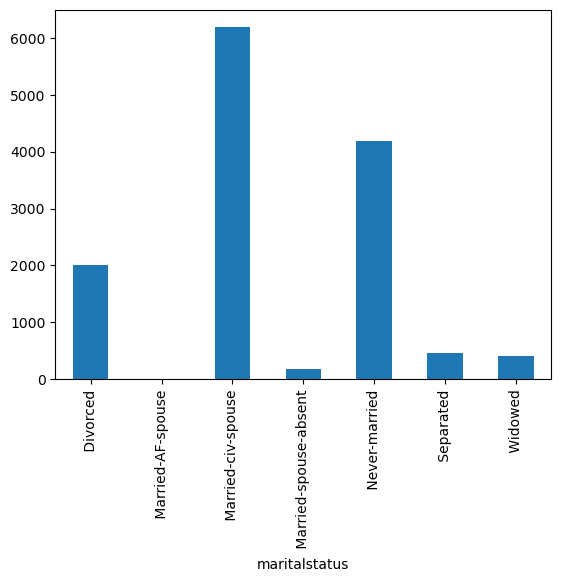

In [28]:
pd.crosstab(Train['Salary'],Train['maritalstatus']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

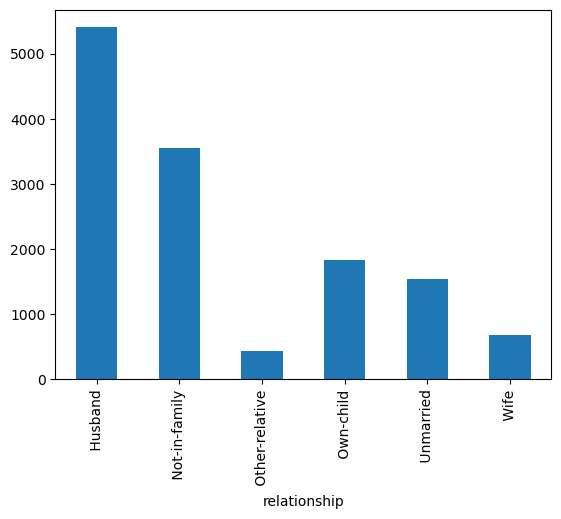

In [29]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship', ylabel='maritalstatus'>

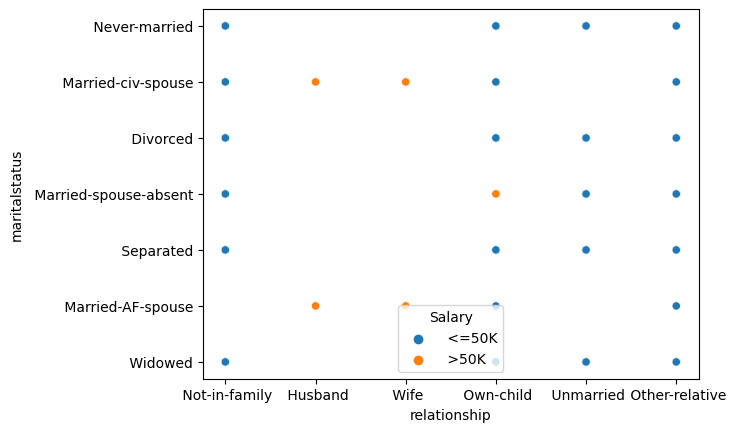

In [30]:
sn.scatterplot(Train['relationship'],Train['maritalstatus'],hue=Train['Salary'])

<AxesSubplot:xlabel='race'>

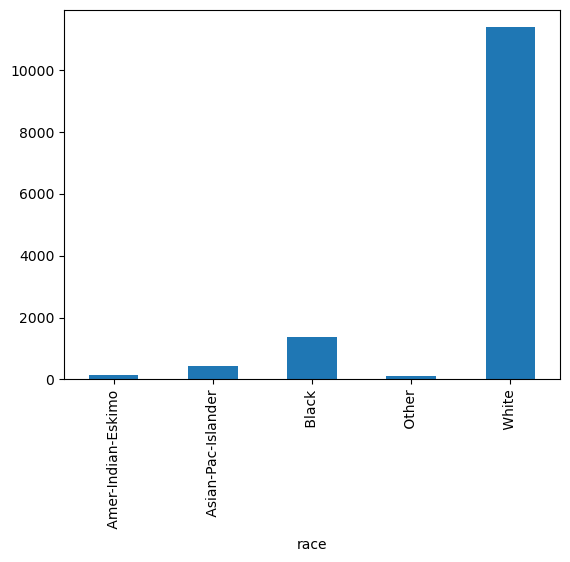

In [31]:
pd.crosstab(Train['Salary'],Train['race']).mean().plot(kind='bar')

In [32]:
A = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [33]:
number = LabelEncoder()
for i in A:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [34]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [35]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [36]:
len(Train.columns)

14

In [37]:
x_train = Train.drop(['Salary'],axis=1).values
y_train = Train['Salary'].values
x_test = Test.drop(['Salary'],axis=1).values
y_test = Test['Salary'].values

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26903, 13), (26903,), (14130, 13), (14130,))

In [39]:
##Normalmization 
## in place of function MinMax Scaler can be used
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [40]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# Model Building

## MultinomialNB

## Xtrain and Ytrain Accuracy

In [41]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [42]:
predicted = model.predict(x_train)

In [43]:
confusion_matrix(y_train,predicted)

array([[20023,     0],
       [ 6880,     0]], dtype=int64)

In [44]:
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

       <=50K       0.74      1.00      0.85     20023
        >50K       0.00      0.00      0.00      6880

    accuracy                           0.74     26903
   macro avg       0.37      0.50      0.43     26903
weighted avg       0.55      0.74      0.64     26903



## Xtest and Ytrain Accuracy

In [45]:
Test = MultinomialNB()
Test.fit(x_test,y_test)

MultinomialNB()

In [46]:
Test_predicted = model.predict(x_test)

In [47]:
confusion_matrix(y_test,Test_predicted)

array([[10620,     0],
       [ 3510,     0]], dtype=int64)

In [48]:
print(classification_report(y_test,Test_predicted))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     10620
        >50K       0.00      0.00      0.00      3510

    accuracy                           0.75     14130
   macro avg       0.38      0.50      0.43     14130
weighted avg       0.56      0.75      0.65     14130



# Ytest accuracy on Xtrain & Ytrain

In [49]:
Combine = MultinomialNB()
test_pred =Combine.fit(x_train,y_train).predict(x_test)

In [50]:
confusion_matrix(y_test, test_pred)

array([[10620,     0],
       [ 3510,     0]], dtype=int64)

In [51]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     10620
        >50K       0.00      0.00      0.00      3510

    accuracy                           0.75     14130
   macro avg       0.38      0.50      0.43     14130
weighted avg       0.56      0.75      0.65     14130



# CategoricalNB

## Xtrain and Ytrain

In [52]:
model = CategoricalNB()
model.fit(x_train,y_train)

CategoricalNB()

In [53]:
predicted = model.predict(x_train)

In [54]:
confusion_matrix(y_train,predicted)

array([[20023,     0],
       [ 6733,   147]], dtype=int64)

In [55]:
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     20023
        >50K       1.00      0.02      0.04      6880

    accuracy                           0.75     26903
   macro avg       0.87      0.51      0.45     26903
weighted avg       0.81      0.75      0.65     26903



## Xtest and Ytest

In [56]:
model1 = CategoricalNB()

# Train the model using the training sets
model1.fit(x_test,y_test)

CategoricalNB()

In [57]:
predicted = model1.predict(x_test)

In [58]:
confusion_matrix(y_test,predicted)

array([[10620,     0],
       [ 3430,    80]], dtype=int64)

In [59]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86     10620
        >50K       1.00      0.02      0.04      3510

    accuracy                           0.76     14130
   macro avg       0.88      0.51      0.45     14130
weighted avg       0.82      0.76      0.66     14130



## Ytest accuracy on Xtrain & Ytrain`

In [60]:
Combine1 = CategoricalNB()

In [61]:
test_pred_1 =Combine1.fit(x_train,y_train).predict(x_test)

In [62]:
confusion_matrix(y_test, test_pred_1)

array([[10620,     0],
       [ 3430,    80]], dtype=int64)

In [63]:
print(classification_report(y_test, test_pred_1))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86     10620
        >50K       1.00      0.02      0.04      3510

    accuracy                           0.76     14130
   macro avg       0.88      0.51      0.45     14130
weighted avg       0.82      0.76      0.66     14130



# GaussianNB

In [64]:
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [65]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau 

0.7933687692822362

In [66]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau

0.7951875442321302

In [67]:
confusion_matrix(y_test, test_pred_gau)

array([[10056,   564],
       [ 2330,  1180]], dtype=int64)

In [68]:
print(classification_report(y_test,test_pred_gau))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10620
        >50K       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg       0.78      0.80      0.77     14130



# Accuracy

### MultinomialNB (Naive Bayes classifier for multinomial models)

Train Accuracy= 0.74

Test= 0.75

Y_test on train data= 0.75

### CategoricalNB (Naive Bayes classifier for categorical features)

Train Accuracy= 0.75

Test= 0.76

Y_test on train data= 0.76

### GaussianNB (Naive Bayes classifier for numeric models)


Train Accuracy= 0.793

Test= 0.795

Y_test on train data= 0.80